# Домашее задание №3

## Задание 1

В файле Worldbank_tech.xlsx содержаться данные Всемирного банка по ряду показателей по странам. В файле следующие переменные:
    
    - country_name: Country Name
    - country_code: Country Code
    - internet: Internet users (per 100 people)
    - secure: Secure Internet servers (per 1 million people)
    - export: Communications, computer, etc. (% of service exports)
    - import: Communications, computer, etc. (% of service imports)
    - telephone: Fixed telephone subscriptions (per 100 people)
    - hightech: High-technology exports (current US$)
    - mobile: Mobile cellular subscriptions (per 100 people)
    

Проведите иерархический кластерный анализ данных с использованием не менее 4-х метрических переменных. Выполните следующие пункты:

        1.	Обоснуйте выбор переменных кластеризации.

        2.	Выберите оптимальный метод иерархической кластеризации и обоснуйте свой выбор.

        3.	Создайте дендрограмму, опишите её.

        4.	Определите число кластеров, объясните своё решение.

        5.	Опишите получившиеся кластеры на основе описательной статистки. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.

        6.	Дайте названия кластерам и обоснуйте их.

        7.	Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?

In [29]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Читаем датафрейм
df = pd.read_excel('Worldbank_tech.xlsx')
df

,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile
0,Afghanistan,AFG,8.260000,1.414229,72.652794,9.053154,0.343677,NaN,61.577619
1,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,15123662.0,106.380207
2,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2449466.0,113.031094
3,American Samoa,ASM,NaN,72.022759,NaN,NaN,18.005690,NaN,NaN
4,Andorra,ADO,96.910000,1631.830630,NaN,NaN,47.992588,NaN,88.123533
...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,54.839137,453.781837,NaN,NaN,71.090491,NaN,NaN
213,West Bank and Gaza,WBG,57.424192,5.653368,44.171827,NaN,8.936393,5099724.0,77.624612
214,"Yemen, Rep.",YEM,25.099514,0.633567,56.462032,NaN,4.679835,2946931.0,67.980973
215,Zambia,ZMB,21.000000,4.317851,8.549899,NaN,0.748505,36503179.0,74.471778


In [31]:
# Проверим на наличие пустых ячеек
df.isnull().sum()

country_name     0
country_code     0
internet        15
secure          10
export          73
import          94
telephone        8
hightech        82
mobile          13
dtype: int64

In [32]:
# Удаляем все NaN и считаем корелляцию между числовыми переменными
df.dropna().corr(numeric_only=True)

,internet,secure,export,import,telephone,hightech,mobile
internet,1.000000,0.597546,0.213892,0.396983,0.725407,0.141888,0.354540
secure,0.597546,1.000000,0.254015,0.260923,0.478184,0.106955,-0.033661
export,0.213892,0.254015,1.000000,0.442726,0.254919,0.202617,0.062397
import,0.396983,0.260923,0.442726,1.000000,0.421557,0.049743,0.111487
telephone,0.725407,0.478184,0.254919,0.421557,1.000000,0.228382,0.192052
hightech,0.141888,0.106955,0.202617,0.049743,0.228382,1.000000,-0.051324
mobile,0.354540,-0.033661,0.062397,0.111487,0.192052,-0.051324,1.000000


In [33]:
# Столбец internet сильно кореллирует с secure и telephone, поэтому удалим его
df.dropna().drop(columns=['internet']).corr(numeric_only=True)

,secure,export,import,telephone,hightech,mobile
secure,1.000000,0.254015,0.260923,0.478184,0.106955,-0.033661
export,0.254015,1.000000,0.442726,0.254919,0.202617,0.062397
import,0.260923,0.442726,1.000000,0.421557,0.049743,0.111487
telephone,0.478184,0.254919,0.421557,1.000000,0.228382,0.192052
hightech,0.106955,0.202617,0.049743,0.228382,1.000000,-0.051324
mobile,-0.033661,0.062397,0.111487,0.192052,-0.051324,1.000000


In [34]:
# telephone сильнее всех кореллирует с двумя другими - secure и import, поэтому также удалим его
cols = ['secure', 'export', 'import', 'hightech', 'mobile']
df.dropna()[cols].corr()

,secure,export,import,hightech,mobile
secure,1.000000,0.254015,0.260923,0.106955,-0.033661
export,0.254015,1.000000,0.442726,0.202617,0.062397
import,0.260923,0.442726,1.000000,0.049743,0.111487
hightech,0.106955,0.202617,0.049743,1.000000,-0.051324
mobile,-0.033661,0.062397,0.111487,-0.051324,1.000000


In [35]:
df = df.dropna()[cols]

In [36]:
df0 = pd.DataFrame()

z_cols = [] # Сохраняем список стандартизированных столбцоы

# Стандартизируем значения выбранных переменных
for i in cols:
  z_cols.append('z_' + i)
  df0["z_" + i] = (df[i] - df[i].mean())/df[i].std() #стандартизируем значения переменных
  df0[i] = df[i]
  
df0 = df0.reset_index().drop(columns=['index'])
df0

,z_secure,secure,z_export,export,z_import,import,z_hightech,hightech,z_mobile,mobile
0,-0.535059,37.727137,-0.482114,25.303169,-1.732156,11.124101,-0.313982,1.512366e+07,-0.426680,106.380207
1,-0.569253,2.546228,1.302894,59.256825,1.297832,58.012028,-0.314180,2.449466e+06,-0.209118,113.031094
2,-0.510210,63.293537,0.803638,49.760189,-0.001197,37.910044,-0.291696,1.442451e+09,0.800910,143.907797
3,-0.524060,49.043779,-0.458722,25.748135,-1.672538,12.046667,-0.314046,1.106779e+07,-0.139952,115.145509
4,-0.300418,279.144086,-1.036134,14.764849,0.396284,44.060914,-0.314200,1.194859e+06,0.533132,135.721780
...,...,...,...,...,...,...,...,...,...,...
94,-0.508098,65.467209,0.652724,46.889568,-0.431394,31.252907,-0.292564,1.386829e+09,0.804684,144.023179
95,0.772037,1382.567461,0.703440,47.854272,0.629975,47.677185,0.769674,6.941727e+10,0.206966,125.750843
96,1.031867,1649.900277,0.564764,45.216431,0.270570,42.115538,2.095889,1.543540e+11,-0.060095,117.586744
97,-0.468064,106.657186,-0.466097,25.607852,-1.062826,21.481726,-0.310063,2.661192e+08,1.334170,160.209644


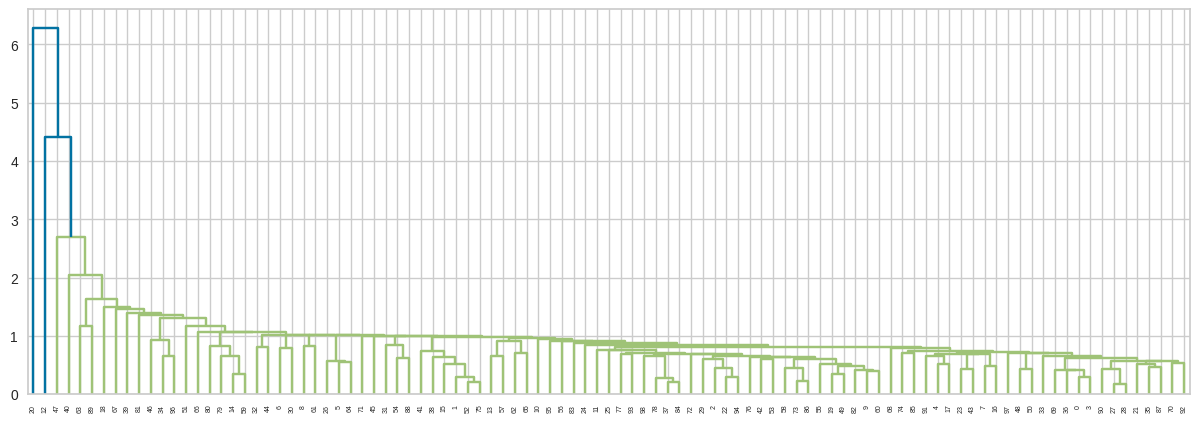

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Применим несколько алгоритмов иерархической кластеризации

# Близлежащий сосед
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df0[z_cols], 'single'))


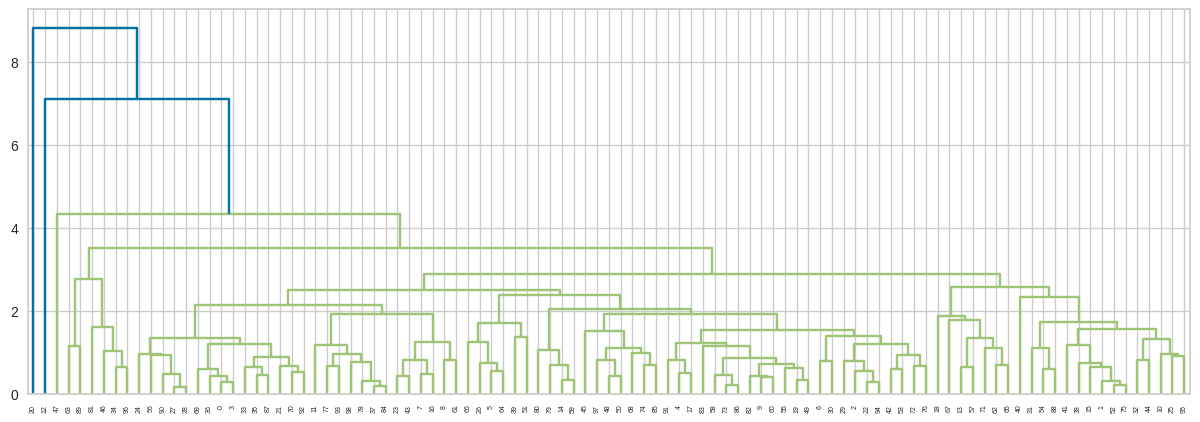

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Межгрупповые связи
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df0[z_cols], 'average'))

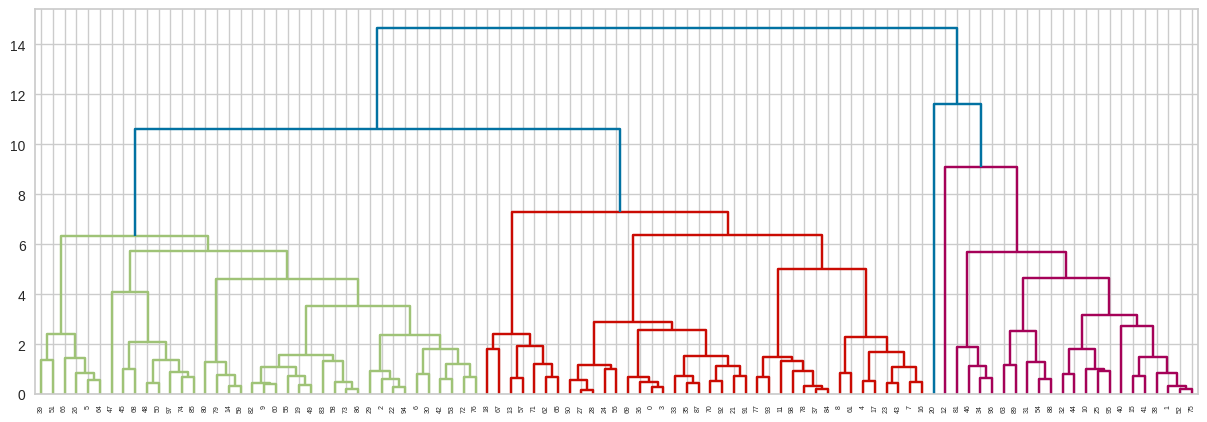

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Метод Варда
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df0[z_cols], 'ward'))

# При использовании метода Варда получаются наиболее отчетливые кластеры, близкие по размеру,
# поэтому будем работать именно с ним


# Удалим выбросы 12 и 20
df0 = df0.drop(index=[12]).drop(index=[20])

In [40]:
# Найдем количество кластеров через индекс Калински-Харабаша
from sklearn.metrics import calinski_harabasz_score

Z = linkage(df0[z_cols], 'ward')

for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Число кластеров: {}, индекс: {}'.format(k, calinski_harabasz_score(df0[z_cols], labels)))

Число кластеров: 2, индекс: 33.394709230655515
Число кластеров: 3, индекс: 32.89874696706514
Число кластеров: 4, индекс: 29.039072733233542
Число кластеров: 5, индекс: 26.857492786859094
Число кластеров: 6, индекс: 26.518822355879802
Число кластеров: 7, индекс: 26.346716442041853
Число кластеров: 8, индекс: 27.155491142646994
Число кластеров: 9, индекс: 27.601583782109234


In [41]:
 #проводим рассчёты для 3-х кластеров
labels = fcluster(Z, t=3, criterion='maxclust')
labels

array([3, 1, 2, 3, 3, 2, 2, 3, 3, 2, 1, 3, 3, 2, 1, 3, 3, 3, 2, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 2, 1, 1, 3, 1, 3, 3, 3, 1, 2, 1, 1, 2, 3, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 3, 3, 2, 2, 2, 3, 3, 1, 2, 3, 2, 3,
       2, 3, 3, 3, 2, 2, 2, 1, 2, 3, 3, 2, 2, 1, 2, 2, 3, 2, 2, 3, 1, 1,
       3, 3, 3, 3, 2, 1, 1, 2, 3], dtype=int32)

In [42]:
 # Создаём новую переменную, отражающую принадлежность наблюдения к кластеру
df0['culster_labels'] = labels
df0

,z_secure,secure,z_export,export,z_import,import,z_hightech,hightech,z_mobile,mobile,culster_labels
0,-0.535059,37.727137,-0.482114,25.303169,-1.732156,11.124101,-0.313982,1.512366e+07,-0.426680,106.380207,3
1,-0.569253,2.546228,1.302894,59.256825,1.297832,58.012028,-0.314180,2.449466e+06,-0.209118,113.031094,1
2,-0.510210,63.293537,0.803638,49.760189,-0.001197,37.910044,-0.291696,1.442451e+09,0.800910,143.907797,2
3,-0.524060,49.043779,-0.458722,25.748135,-1.672538,12.046667,-0.314046,1.106779e+07,-0.139952,115.145509,3
4,-0.300418,279.144086,-1.036134,14.764849,0.396284,44.060914,-0.314200,1.194859e+06,0.533132,135.721780,3
...,...,...,...,...,...,...,...,...,...,...,...
94,-0.508098,65.467209,0.652724,46.889568,-0.431394,31.252907,-0.292564,1.386829e+09,0.804684,144.023179,2
95,0.772037,1382.567461,0.703440,47.854272,0.629975,47.677185,0.769674,6.941727e+10,0.206966,125.750843,1
96,1.031867,1649.900277,0.564764,45.216431,0.270570,42.115538,2.095889,1.543540e+11,-0.060095,117.586744,1
97,-0.468064,106.657186,-0.466097,25.607852,-1.062826,21.481726,-0.310063,2.661192e+08,1.334170,160.209644,2


In [43]:
df0['culster_labels'].value_counts()

culster_labels
3    38
2    38
1    21
Name: count, dtype: int64

In [44]:
# Выведем средние значения каждой переменной в кластерах
df0.groupby('culster_labels')[cols].mean()

,secure,export,import,hightech,mobile
culster_labels,,,,,
1,1186.119549,56.825886,56.594372,5.328949e+10,122.198880
2,568.405998,31.280576,36.856807,4.727507e+09,143.575849
3,118.755026,24.762418,29.450588,3.665038e+09,96.047284


## Названия кластеров

* **Кластер 1 - "Технологически лидирующие страны"**

В этом кластере наблюдаются самые высокие средние показатели почти по всем 5 параметрам (кроме mobile, где они уступают кластеру 2). Особенно наблюдается отрыв в показателе 'secure' - количество безопасных интернет сервисов на 1 млн человек.

* **Кластер 2 - "Технологически развивающиеся страны"**

В этом кластере наблюдаются средние показатели по всем параметрам. Единственное, чем выделяются страны этого кластера - большое количество пользователей мобильных телефонов (показатель 'mobile').

* **Кластер 3 - "Технологически отстающие страны"**

В этом кластере наблюдаются самые низкие показатели по всем 5 параметрам.

## Почему получились такие кластеры?

* 3 кластера соответствуют трём естественным группам показателей - высокие, средние и низкие, которые отражают различия в технологическом развитии стран. Это вполне соответствует структуре рынка.

## Задание 2

В файле Video_Games_Sales.csv содержаться данные о продажах видеоигр.
Источник: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

В файле следующие переменные::
    
    - Name: The game’s name
    - Platform: Platform of the game’s release (i.e. PC, PS4, etc.)
    - Year_of_Release: Year of the game's release
    - Genre: Genre of the game
    - Publisher: Publisher of the game
    - NA_Sales: Sales in North America (in millions)
    - EU_Sales: Sales in Europe (in millions)
    - JP_Sales: Sales in Japan (in millions)
    - Other_Sales: Sales in the rest of the world (in millions)
    - Global_Sales: Total worldwide sales.
    - Critic_score: Aggregate score compiled by Metacritic staff
    - Criticcount: The number of critics used in coming up with the Criticscore
    - User_score: Score by Metacritic's subscribers
    - Usercount: Number of users who gave the userscore
    - Developer: Party responsible for creating the game
    - Rating: The ESRB ratings


Проведите кластерный анализ на основе алгоритмов k-средних или DBSCAN с использованием не менее 4-х метрических переменных. Выполните следующие пункты:

    1.Обоснуйте выбор переменных кластеризации.

    2.Выберите один из двух алгоритмов кластеризации (k-средних или DBSCAN) и обоснуйте свой выбор.

    3.Определите число кластеров, объясните своё решение.

    4.Опишите получившиеся кластеры с помощью описательной статистики. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.

    5.Дайте названия кластерам и обоснуйте их.

    6.Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?


Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

In [45]:
# Читаем датасет
df = pd.read_csv('video_games_sales.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Проверяем на наличие NaN в числовых столбцах
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [47]:
# Считаем корелляции между числовыми столбцами
df.dropna().corr(numeric_only=True)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.016239,0.041346,-0.038443,0.042315,0.006661,-0.007661,0.203336,0.199348
NA_Sales,-0.016239,1.000000,0.841808,0.468607,0.726757,0.955793,0.233580,0.283917,0.246208
EU_Sales,0.041346,0.841808,1.000000,0.519929,0.716330,0.939313,0.213102,0.265740,0.283504
JP_Sales,-0.038443,0.468607,0.519929,1.000000,0.394823,0.613546,0.147314,0.168299,0.072773
Other_Sales,0.042315,0.726757,0.716330,0.394823,1.000000,0.804028,0.191509,0.239513,0.240085
Global_Sales,0.006661,0.955793,0.939313,0.613546,0.804028,1.000000,0.237556,0.290397,0.264151
Critic_Score,-0.007661,0.233580,0.213102,0.147314,0.191509,0.237556,1.000000,0.396478,0.265639
Critic_Count,0.203336,0.283917,0.265740,0.168299,0.239513,0.290397,0.396478,1.000000,0.365603
User_Count,0.199348,0.246208,0.283504,0.072773,0.240085,0.264151,0.265639,0.365603,1.000000


In [48]:
# 'Global_Sales' сильно кореллирует со всеми остальными '_Sales', поэтому оставим только её
# У нас остаётся 5 переменных, которые слабо кореллирует между собой, по ним мы будем строить кластеризацию

# Заводим список названий выбранных столбцов
cols = ['Year_of_Release', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count']


df = df.dropna()[cols]
df.corr(numeric_only=True)

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,0.006661,-0.007661,0.203336,0.199348
Global_Sales,0.006661,1.000000,0.237556,0.290397,0.264151
Critic_Score,-0.007661,0.237556,1.000000,0.396478,0.265639
Critic_Count,0.203336,0.290397,0.396478,1.000000,0.365603
User_Count,0.199348,0.264151,0.265639,0.365603,1.000000


In [49]:
# Стандартизированные столбцы
z_cols = []

for col in cols:
    z_cols.append('z_' + col)
    # Стандартизируем значения столбцов
    df['z_' + col] = (df[col] - df[col].mean())/df[col].std()

# Пересчитываем индексы и удаляем стобец с ними
df = df.reset_index().drop(columns=['index'])
X = df[z_cols]
X

,z_Year_of_Release,z_Global_Sales,z_Critic_Score,z_Critic_Count,z_User_Count
0,-0.341176,41.637276,0.413014,1.147975,0.250716
1,0.133743,17.694638,0.845647,2.292368,0.909519
2,0.371202,16.294037,0.701436,2.292368,0.029412
3,-0.341176,14.781388,1.350385,1.876225,0.436270
4,-0.341176,14.333196,-0.884885,0.627797,-0.077835
...,...,...,...,...,...
6820,-1.528473,-0.390941,-1.750150,-1.296864,-0.261687
6821,-1.291013,-0.390941,0.773541,-0.880721,-0.282115
6822,1.558498,-0.390941,0.701436,-0.464579,0.403926
6823,0.846121,-0.390941,-0.668568,-0.880721,-0.224236


In [50]:
from sklearn.cluster import KMeans

# Рассчитываем количество кластеров через индекс Калински-Харабаша
for k in range (2, 15):
    labels = KMeans(n_clusters=k).fit_predict(X)
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(X, labels)))
    
# Самый высокий индекс получился при 6 кластерах

Число кластеров: 2, индекс 1908.5583465570685
Число кластеров: 3, индекс 1749.3611568774156
Число кластеров: 4, индекс 1959.3811595055627
Число кластеров: 5, индекс 1662.4047723608348
Число кластеров: 6, индекс 1757.0092400040044
Число кластеров: 7, индекс 1972.6876873779058
Число кластеров: 8, индекс 1883.1719133305305
Число кластеров: 9, индекс 1854.8094592210155
Число кластеров: 10, индекс 1817.45777018557
Число кластеров: 11, индекс 1763.8013396936715
Число кластеров: 12, индекс 1784.817595265044
Число кластеров: 13, индекс 1751.9591955970568
Число кластеров: 14, индекс 1754.4274211409636


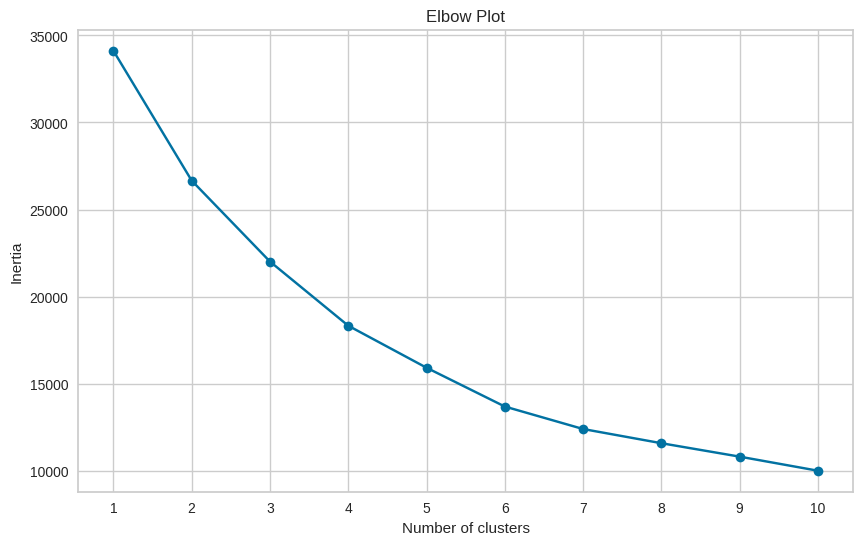

In [51]:
inertia = []

# Рассчитываем инерцию при кол-ве кластеров от 1 до 10
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Строим локтевой график
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

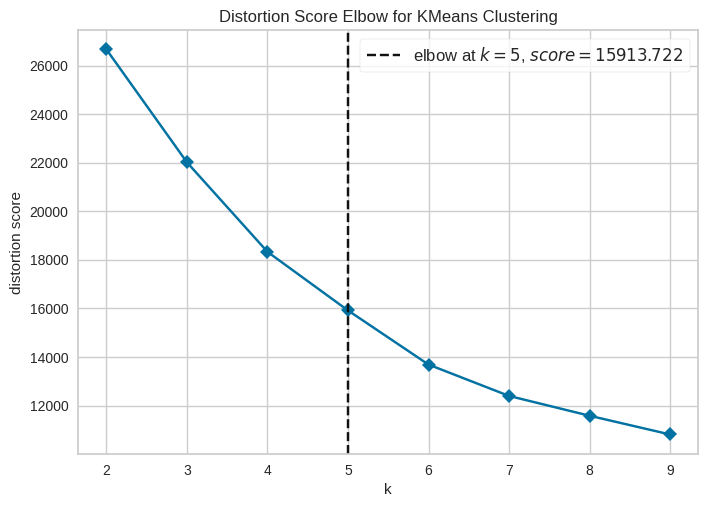

In [52]:
from yellowbrick.cluster import KElbowVisualizer

# Определяем положение локтя для наилучшего разбиения на кластеры.
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(X)
visualizer.show()
plt.show()

In [53]:
kmeans_model = KMeans(n_clusters=5).fit_predict(X) #оставляем 5 кластеров
df['Clusters'] = kmeans_model
df.head()

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Count,z_Year_of_Release,z_Global_Sales,z_Critic_Score,z_Critic_Count,z_User_Count,Clusters
0,2006.0,82.53,76.0,51.0,322.0,-0.341176,41.637276,0.413014,1.147975,0.250716,2
1,2008.0,35.52,82.0,73.0,709.0,0.133743,17.694638,0.845647,2.292368,0.909519,2
2,2009.0,32.77,80.0,73.0,192.0,0.371202,16.294037,0.701436,2.292368,0.029412,2
3,2006.0,29.80,89.0,65.0,431.0,-0.341176,14.781388,1.350385,1.876225,0.436270,2
4,2006.0,28.92,58.0,41.0,129.0,-0.341176,14.333196,-0.884885,0.627797,-0.077835,2


In [54]:
# Считаем количество игр в каждом кластере

# Нет слишком малочисленных или слишком многочисленных кластеров - норм
df['Clusters'].value_counts()

Clusters
0    2313
1    1580
3    1534
4    1274
2     124
Name: count, dtype: int64

In [55]:
# Выводим средние в каждом кластере, чтобы описать их
df.groupby('Clusters')[cols].mean(numeric_only=True)

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Count
Clusters,,,,,
0,2003.707307,0.642737,75.983571,24.258539,46.077389
1,2011.837975,0.425513,72.022152,20.992405,121.039873
2,2009.838710,8.148629,87.725806,66.580645,3273.145161
3,2006.687744,0.283175,50.786832,17.281617,23.108866
4,2009.417582,1.336947,79.495290,57.622449,355.840659


In [56]:
df.groupby('Clusters')[z_cols].mean(numeric_only=True)

,z_Year_of_Release,z_Global_Sales,z_Critic_Score,z_Critic_Count,z_User_Count
Clusters,,,,,
0,-0.885597,-0.068682,0.411829,-0.243059,-0.218997
1,1.045105,-0.179316,0.126189,-0.412956,-0.091386
2,0.570361,3.754140,1.258509,1.958447,5.274553
3,-0.177865,-0.251810,-1.404994,-0.605983,-0.258097
4,0.470361,0.284886,0.665043,1.492461,0.308324


## Описание и названия кластеров

* **Кластер 0 - "Устаревшие игры"**

В этот кластер попали игры c наименьшим средним годом выпуска ('Year_of_Release') равным 2003. Количество игроков ('User_Count') и продажи по миру ('Global_Sales') в этом кластере практические самые низкие - 4-е из 5 среди кластеров. На игры в этом кластере обращают внимание мало критиков ('Critic_count'). По этому показателю кластер опять же 4-й из 5. В этот кластер попало больше всего игр из выборки - 2314.

* **Кластер 1 - "Игры - новинки"**

В этот кластер попали игры, выпущенные позже всего - средний показатель 'Year_of_Release' равен 2011. У этих игр средняя аудитория - 'User_Count' равен 120, что меньше, чем у лидеров, но больше, чем у непопулярных и устаревших игр. Эти игры не получили много оценок критиков и пока имеют мало продаж - 'Global_Sales' равен 0.42.

* **Кластер 2 - "Лидеры игровой индустрии"**

В этот кластер попали игры, выпущенные не слишком давно, но и не слишком недавно. Средний год выпуска ('Year_of_Release') составляет 2009. Все остальные показатели являются наивысшими среди всех кластеров. Особенно заметен отрыв в количестве пользователей ('User_Count'). Это высококачественные игры, которые успели набрать аудиторию и до сих пор хорошо продаются. Также этот кластер самый малочисленный - в него попали всего 124 игры.

* **Кластер 3 - "Непопулярные игры"**

В этот кластер попали игры с наименьшими показателями по 4 параметрам - продажи по миру ('Global_Sales'), количество игроков ('User_Count'), оценки критиков ('Critic_Score') и количество критиков оценивших игру ('Critic_Count'). Эти игры не привлекают внимания игроков и плохо продаются.

* **Кластер 4 - "Среднестатистические игры"**

В этот кластер попали игры, выпущенные в то же время, что и лидеры игровой индустрии - средний 'Year_of_Release' равен 2009. По всем остальным показателям игры в этом кластере занимают 2-е место среди 5 кластеров. Это хорошие игры с большим числом пользователей и хорошими продажами, но не имеющие ярких отличий.

## Почему получились такие кластеры?

Получившиеся кластеры отражают структуру рынка в целом - есть высококачественный продукт, лидирующий на рынке, есть средний, есть низкокачественный и непопулярный. Также такое разбиение отражает актуальность и поведение пользователей - какие-то игры устаревают, какие-то становятся классикой, а какие-то только набирают популярность.

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 13:00 30 октября.